# Homework4: Discrete VAE + GAN.

In [41]:
%matplotlib inline

## Task 1: Theory (4pt)

### Problem 1: ELBO surgery (1pt)

In lecture 7 we proved the [ELBO surgery](http://approximateinference.org/accepted/HoffmanJohnson2016.pdf) theorem:
$$
    \frac{1}{n} \sum_{i=1}^n KL(q(\mathbf{z} | \mathbf{x}_i) || p(\mathbf{z})) = KL(q_{\text{agg}}(\mathbf{z}) || p(\mathbf{z})) + \mathbb{I}_{q} [\mathbf{x}, \mathbf{z}],
$$
where the first term is $KL(q_{\text{agg}}(\mathbf{z}) || p(\mathbf{z}))$ includes the aggregated posterior distribution $q_{\text{agg}}(\mathbf{z})$ and the prior distribution $p(\mathbf{z})$. Our goal now is to deal with the second term. At the lecture, the second term was equal to:

$$
    \mathbb{I}_{q} [\mathbf{x}, \mathbf{z}] = \frac{1}{n}\sum_{i=1}^n KL(q(\mathbf{z} | \mathbf{x}_i) || q_{\text{agg}}(\mathbf{z})).
$$
In fact, this is a mutual information between $\mathbf{x}$ and $\mathbf{z}$ on the empirical distribution of data and the distribution of $q(\mathbf{z} | \mathbf{x})$. Let treat the index of the sample $i$ as a random variable.
$$
    q(i, \mathbf{z}) = q(i) q(\mathbf{z} | i); \quad p(i, \mathbf{z}) = p(i) p(\mathbf{z}); \quad
    q(i) = p(i) = \frac{1}{n}.
$$
$$
    \quad q(\mathbf{z} | i) = q(\mathbf{z} | \mathbf{x}_i) \quad q_{\text{agg}}(\mathbf{z}) = \sum_{i=1}^n q(i, \mathbf{z}) = \frac{1}{n} \sum_{i=1}^n q(\mathbf{z} | \mathbf{x}_i);  
$$
Mutual information is a measure of independence between two random variables.
$$
	\mathbb{I}_{q} [\mathbf{x}, \mathbf{z}] = \mathbb{E}_{q(i, \mathbf{z})} \log \frac{q(i, \mathbf{z})}{q(i)q_{\text{agg}}(\mathbf{z})}.
$$
Prove that 2 expressions for mutual information are equal to each other.

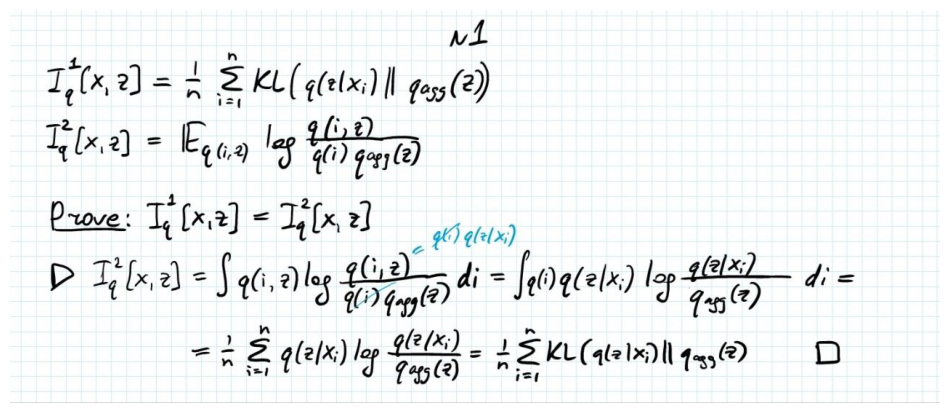

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-4-1.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

### Problem 2: Gumbel-Max trick (2pt)

In this problem you have to prove the Gumbel-Max trick that we have discussed on the Lecture 12.

Let $\pi_1, \pi_2, \dots \pi_K, \in (0, 1)$ and $\sum\limits_{k = 1}^{K} \pi_k = 1$. Consider the discrete random variable:

$$
  c = \arg\max_{k} \left[\log \pi_k + g_k\right].
$$

In the formula above $g_k$ ($k \in \{1, \dots K\}$) are independent random variables distributed following the $\text{Gumbel}(0, 1)$ distribution ([wiki](https://en.wikipedia.org/wiki/Gumbel_distribution)), i.e. $g_k \sim \text{Gumbel}(0, 1)$.

Note that $g_k = - \log (- \log u)$, where $u \sim \text{Uniform}[0, 1]$.

Our goal is to prove that $c \sim \text{Categorical}(\pi_1, \dots \pi_K)$.

1. Find cumulative distribution function ($F_{g}(x) = P(g < x)$) of Gumbel distribution.

2. Find density of the Gumbel distribution (derivative of cdf).

3. Consider random variables $\zeta_k = \log \pi_k + g_k$. Let's fix $k^* \in \{1, \dots K\}$ and look at the following probability $P\bigl( \{\zeta_{k} \leq \zeta_{k^*}\} \text{ for all } k \neq k^*\bigr)$. Prove that

$$
  P\bigl( \bigcap\limits_{k \neq k^*} \{\zeta_{k} \leq \zeta_{k^*}\}\bigr) = \pi_{k^*}.
$$


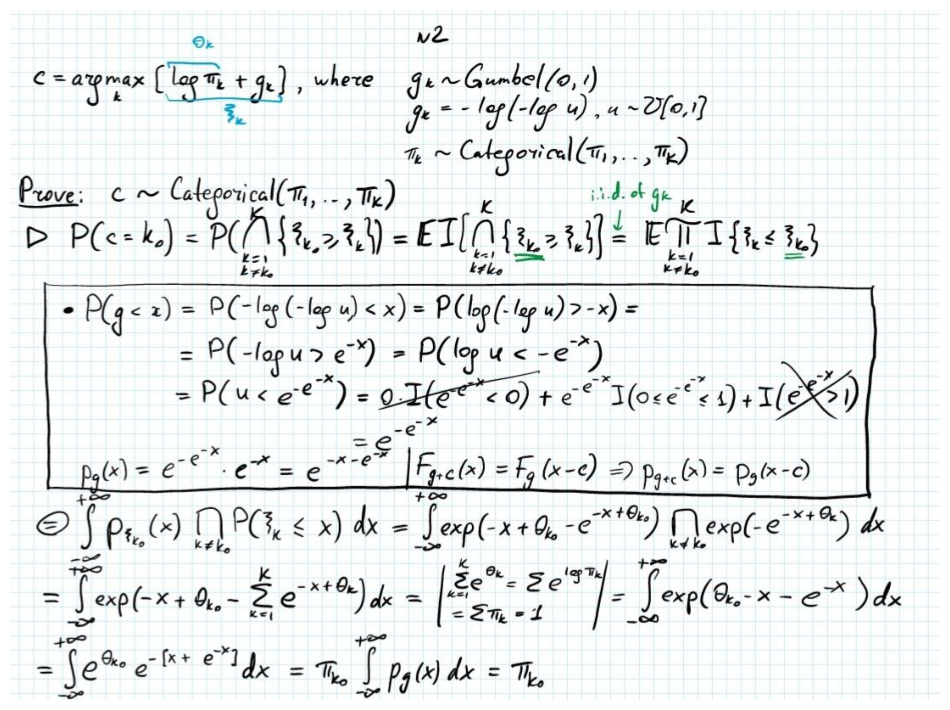

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-4-2.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

```your solution```

### Problem 3: Least Squares GAN (1pt)
    
The Vanilla GAN often suffers from problems with a vanishing gradient. [Least Squares GAN](https://arxiv.org/abs/1611.04076) tries to solve this problem by replacing the error function with the following:
$$
   	\min_D V(D) = \min_D \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - b)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - a)^2 \right]
$$
$$
   	\min_G V(G) = \min_G \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - c)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - c)^2 \right],
$$
where $a,b,c \in \mathbb{R}$ some fixed constants.

1) Write out the formula for the optimal discriminator $D^*$.
  
2) Write out the expression for the error function of the generator $V(G)$ in the case of an optimal discriminator $D^*$.
  
3) Prove that for $b - c = 1$, $b - a = 2$, the error function of the generator $V(G)$ in the case of the optimal discriminator $D^*$ takes the form:
$$
   	V(G) = \chi^2_{\text{Pearson}} \left(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} || p(\mathbf{x} | \boldsymbol{\theta})\right),
$$
where $\chi^2_{\text{Pearson}} (p || q)$ is a squared Pearson divergence:
$$
   	\chi^2_{\text{Pearson}} (p || q) = \int \frac{(p(\mathbf{x}) - q(\mathbf{x}))^2}{p(\mathbf{x})} d \mathbf{x}.
$$

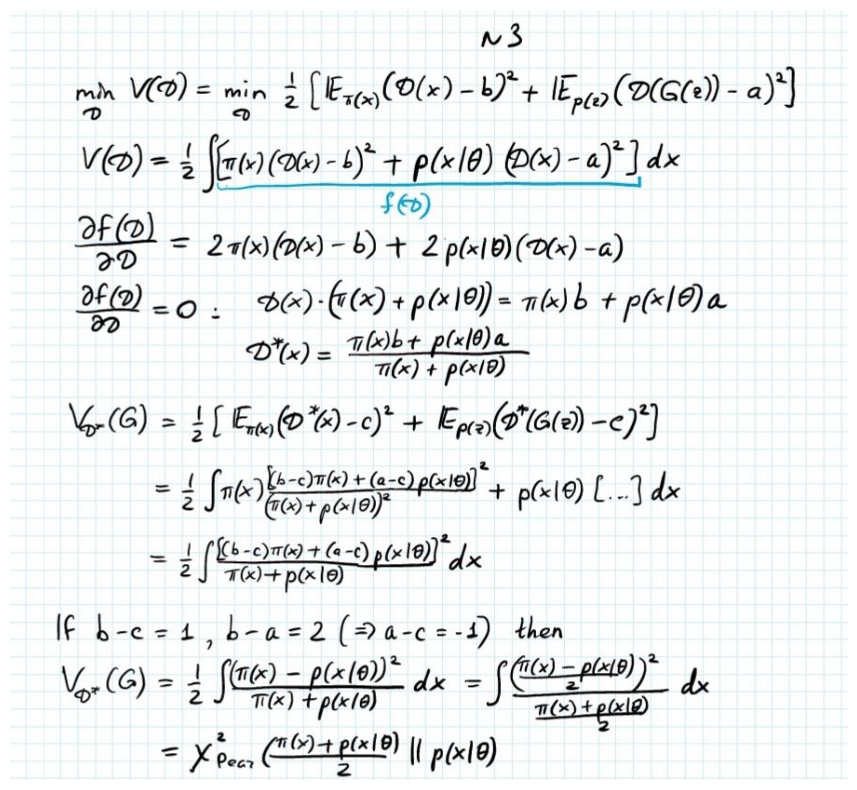

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-4-3.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

```
your solution
```

In [1]:
REPO_NAME = "2023-DGM-MIPT-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2023-DGM-MIPT-course'...
remote: Enumerating objects: 813, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 813 (delta 105), reused 239 (delta 103), pack-reused 570
Receiving objects: 100% (813/813), 365.99 MiB | 11.48 MiB/s, done.
Resolving deltas: 100% (262/262), done.
Updating files: 100% (335/335), done.
Processing ./2023-DGM-MIPT-course/homeworks
  Preparing metadata (setup.py) ... done
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=6038 sha256=d6f2a2f6e9645c205e6ed60d0adc45fc70c1686d498faccf664c8fa7d0dfb72d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_19_vh13/wheels/d7/24/b0/17b69ee697654689a9a78e4d6d52c72d6c09e07ac2e47017ad
Successfully built dgm-utils


In [2]:
from dgm_utils import train_model, show_samples, plot_training_curves
from dgm_utils import visualize_images, load_dataset

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import entropy
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.nn import functional as F

USE_CUDA = torch.cuda.is_available()

print("cuda is available:", USE_CUDA)

cuda is available: True


In [4]:
# do not change this function
def plot_losses(losses: np.ndarray, title: str):
    n_itr = len(losses)
    xs = np.arange(n_itr)

    plt.figure(figsize=(7, 5))
    plt.plot(xs, losses)
    plt.title(title, fontsize=14)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Loss", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Task 2: VQ-VAE on MNIST (5 pt)

### Training of VQ-VAE model

In this part you will train [VQ-VAE](https://arxiv.org/abs/1711.00937) model that we have discussed at Lecture 12 (see also [VQ-VAE-2](https://arxiv.org/abs/1906.00446) paper).

We will you MNIST dataset in this task.

100%|██████████| 9912422/9912422 [00:00<00:00, 57980070.60it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 108641877.87it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 69866663.26it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1668610.74it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



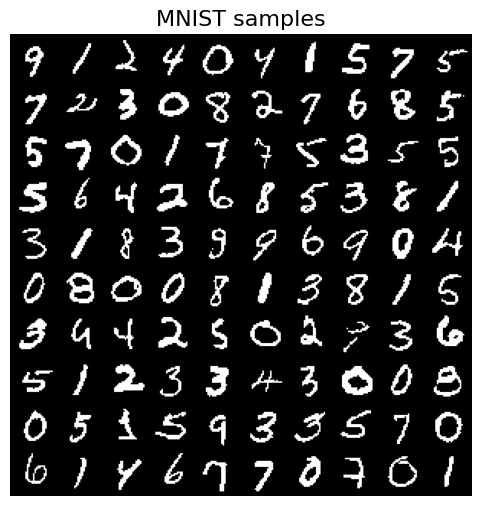

In [5]:
train_data, test_data = load_dataset("mnist", flatten=False, binarize=True)
visualize_images(train_data, "MNIST samples")

VQ-VAE model is a VAE model with discrete latent variable.  

**Reminder:**
* We define  dictionary (word book) space $\{\mathbf{e}_k\}_{k=1}^K$, where $\mathbf{e}_k \in \mathbb{R}^C$, $K$ is the size of the dictionary.
* $\mathbf{z}_e = \text{NN}_e(\mathbf{x}, \boldsymbol{\phi})$ - continuous output of encoder network.
* $\mathbf{z}_q = \mathbf{e}_{k^*}$ is a quantized representation, where $k^* = \text{argmin}_k \| \mathbf{z} - \mathbf{e}_k \|$. It is simple nearest neighbor look up.
* Out deterministic variational posterior:
$$
  q(c = k^* | \mathbf{x}, \boldsymbol{\phi}) = \begin{cases}
  1 , \quad \text{for } k^* = \text{argmin}_k \| \mathbf{z}_e - \mathbf{e}_k \|; \\
  0, \quad \text{otherwise}.
\end{cases}
$$
* Prior distribution is uniform: $p(c) = \text{Uniform}\{1, \dots, K\}$.
* KL divergence between posterior and prior:
$$
  KL(q(c = k^* | \mathbf{x}, \boldsymbol{\phi}), p(c)) = \log K.
$$
* ELBO:
$$
		\mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta})  = \mathbb{E}_{q(c | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{e}_{c} , \boldsymbol{\theta}) - \log K =  \log p(\mathbf{x} | \mathbf{z}_q, \boldsymbol{\theta}) - \log K.
$$
* Vector quantization is non-differentiable operation. We will use **straight-through** gradient estimator (we will copy gradients from decoder input $\mathbf{z}_q$ to encoder output $\mathbf{z}_e$.

**Important modifications:**
Due to the straight-through gradient estimation of mapping from $\mathbf{z}_e$ to $\mathbf{z}_q$, the embeddings $\mathbf{e} receive no gradients from the ELBO.

Therefore, in order to learn the embedding space we add l2 loss (**codebook loss**) to move the embedding vectors $\mathbf{e}$ towards the encoder outputs $\mathbf{z}_e$.

Finally, since the volume of the embedding space is dimensionless, it can grow arbitrarily if the embeddings $\mathbf{e}$ do not train as fast as the encoder parameters. To make sure the encoder commits to an embedding and its output does not grow, we add a **commitment loss**.

Thus, the total training objective becomes:
$$
  \log p(\mathbf{x}| \mathbf{z}_q, \boldsymbol{\theta}) + \| \text{stop_gradient}(\mathbf{z}_e) - \mathbf{e}\|_2^2 + \| \mathbf{z}_e - \text{stop_gradient}(\mathbf{e})\|_2.
$$

Pay attention to the $\text{stop_gradient}(*)$ operator.


Our first step is implement vector quantization procedure. It will also calculate two consistency losses.

In [ ]:
class VectorQuantizer(nn.Module):
    def __init__(
        self, num_embeddings: int = 128, embedding_dim: int = 16, beta: float = 0.25
    ) -> None:
        super().__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings

        self.beta = beta

        # Initialize the embeddings which we will quantize.
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1 / num_embeddings, 1 / num_embeddings)

    def get_code_indices(self, x: torch.Tensor) -> torch.Tensor:
        x = x.permute(0, 2, 3, 1).contiguous()
        input_shape = x.shape[:-1]
        flattened = x.view(-1, self.embedding_dim)
        # ====
        # your code
        # 1) calculate distances from flatten inputs to embeddings
        # 2) find nearest embeddings to each input (use argmin op)
        distances =

        # Derive the indices for minimum distances.
        encoding_indices =

        # ====
        encoding_indices = encoding_indices.view(input_shape)
        return encoding_indices

    def get_quantized(self, encoding_indices: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) get embeddgins with appropriate indices
        # 2) transform tensor from BHWC to BCHW format
        quantized =
        # ====
        return quantized

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) get indices
        # 2) get quantized latents
        # 3) calculate codebook and commitment loss
        #    do not afraid about stop_gradient op
        #    (use .detach() method for quantized latents and x)
        # 4) final loss is codebook_loss + beta * commitment_loss

        quantized =

        loss =

        # ====

        # Straight-through estimator (think about it!).
        quantized = x + (quantized - x).detach()

        return quantized, loss


def test_vector_quantizer():
    x = torch.zeros((1, 16, 7, 7))
    layer = VectorQuantizer()
    indices = layer.get_code_indices(x)
    assert indices.shape == (1, 7, 7)
    quantized = layer.get_quantized(indices)
    assert quantized.shape == (1, 16, 7, 7)
    quantized, loss = layer(x)
    assert quantized.shape == (1, 16, 7, 7)
    assert loss.shape == ()


test_vector_quantizer()

We will use simple encoder/decoder with several strided convolutions.

In [ ]:
class ConvEncoder(nn.Module):
    def __init__(self, latent_dim: int) -> None:
        super().__init__()
        # ====
        # your code
        # define Sequential model with Conv2d and ReLU activation
        self.net =
        # ====

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)


class ConvDecoder(nn.Module):
    def __init__(self, latent_dim: int) -> None:
        super().__init__()
        # ====
        # your code
        # define Sequential model with ConvTransposed2d and ReLU activation

        self.net =
        # ====

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        return self.net(z)

Now we are ready to define our model. It consists of encoder, decoder and vector quatizer.

In [ ]:
class VQVAEModel(nn.Module):
    def __init__(
        self,
        ce_loss_scale: float = 1.0,
        latent_dim: int = 16,
        num_embeddings: int = 64,
        latent_size: tuple = (7, 7),
    ) -> None:
        super().__init__()
        self.encoder = ConvEncoder(latent_dim)
        self.decoder = ConvDecoder(latent_dim)
        self.vq_layer = VectorQuantizer(num_embeddings, latent_dim)
        self.ce_loss_scale = ce_loss_scale
        self.latent_size = latent_size

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) apply encoder
        # 2) apply vector quantizer (it returns quantized representation + vq_loss)
        # 3) apply decoder (it returns decoded samples)

        # ====
        return decoded, vq_loss

    def loss(self, x: torch.Tensor) -> dict:
        # ====
        # your code
        # 1) apply model
        # 2) get cross entropy loss

        # ====
        return {
            "total_loss": self.ce_loss_scale * ce_loss + vq_loss,
            "ce_loss": self.ce_loss_scale * ce_loss,
            "vq_loss": vq_loss,
        }

    def get_indices(self, x: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) apply encoder
        # 2) get indices of codes using vector quantizer
        codebook_indices =
        # ====
        return codebook_indices

    def prior(self, n: int) -> torch.Tensor:
        # ====
        # your code
        # prior distribution is uniform
        # 1) get samples from categorical distribution
        # 2) get quantized representations using vector quantizer
        quantized =
        # ====
        return quantized

    def sample_from_logits(self, logits: torch.Tensor) -> np.ndarray:
        # ====
        # your code
        # our model will return logits, this method applies softmax and samples from the distribution
        # 1) apply softmax to the logits
        # 2) sample from the distribution (e.x. you could use torch.multinomial)
        # be careful with the sizes of the tensors (may be you need to permute/reshape dimensios)

        # ====
        return samples.cpu().numpy()

    def sample(self, n: int) -> np.ndarray:
        with torch.no_grad():
            # ====
            # your code
            # 1) sample from prior distribution
            # 2) apply decoder
            # 3) sample from logits

            # ====
            return samples


def test_vqvae_model():
    model = VQVAEModel().cuda()
    x = torch.zeros((2, 1, 28, 28)).cuda()

    encoded = model.encoder(x)
    size = encoded.shape[2:]
    assert size == model.latent_size

    indices = model.get_indices(x)
    assert indices.shape == (2, 7, 7)

    losses = model.loss(x)
    assert isinstance(losses, dict)
    assert "total_loss" in losses

    quantized = model.prior(10)
    assert quantized.shape == (10, 16, *model.latent_size)

    decoded = model.decoder(quantized)
    assert decoded.shape == (10, 2, 28, 28)

    sampled = model.sample(10)
    assert sampled.shape == (10, 1, 28, 28)


test_vqvae_model()

Let's train our model!

In [ ]:
# ====
# your code
# choose these parameters
BATCH_SIZE =   # any adequate value
EPOCHS =       # < 30
LR =           # < 1e-2
CE_SCALE =     # 0.01 < x < 30.0
# ====

train_data, test_data = load_dataset("mnist", flatten=False, binarize=True)

model = VQVAEModel(ce_loss_scale=CE_SCALE, latent_dim=16, num_embeddings=128)

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    use_cuda=USE_CUDA,
    use_tqdm=True,
    lr=LR,
)

plot_training_curves(train_losses, test_losses)

Now we is able to sample from the trained model.

In [ ]:
# Test losses
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))

# Samples
samples = model.sample(100)
samples = samples.astype("float32")
show_samples(samples, title="Samples")

# Reconstructions
x = next(iter(test_loader))[:50].cuda()
with torch.no_grad():
    decoded, _ = model(x)
    x_recon = model.sample_from_logits(decoded)
x = x.cpu().numpy()
reconstructions = np.concatenate((x, x_recon), axis=0)
reconstructions = reconstructions.astype("float32")
show_samples(reconstructions, title="Reconstructions")

Probably you will get bad samples :(

Do not worry, may be it is OK, we will try to fix your samples! Make sure that reconstructions are almost perfect.

Here, we will visualize latent code indices for test images.

In [ ]:
test_images = next(iter(test_loader))[:100]
x = test_images.cuda()
codebook_indices = model.get_indices(x).cpu().unsqueeze(1)

show_samples(test_images, "Test images")
show_samples(codebook_indices, "Test codes")

### Training of prior autoregressive model

The samples from our VQ-VAE model is not good enough. The authors of the original VQ-VAE paper proposed to train autoregressive model in the latent space after we trained VQ-VAE model.

Remember we have discussed **ELBO surgery** and **aggregrated posterior**. Let recall what do we have in VAE:
* **Training:** we get latent variables $\mathbf{z}$ from variational posterior $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$ for every object $\mathbf{x}$ and then applies decoder ($p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$). It means that in average decoder is applied to the latent variables from aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$.
* **Inference:** We apply decoder to the latent variables from prior distribution $p(\mathbf{z})$.

It means that if our aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$ and prior $p(\mathbf{z})$ is too far from each other, then we get inconsistency.

So let train to remove this inconsistency. To be concrete, let train (autoregressive) model in the latent space that will try to predict samples from the aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$.

We will use our good friend: PixelCNN model.

In [ ]:
class MaskedConv2d(nn.Conv2d):
    def __init__(
        self, mask_type: str, in_channels: int, out_channels: int, kernel_size: int = 5
    ) -> None:
        assert mask_type in ["A", "B"]
        super().__init__(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            padding=kernel_size // 2,
        )
        self.register_buffer("mask", torch.zeros_like(self.weight))
        self.create_mask(mask_type)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        # ====
        # your code

        # ====

    def create_mask(self, mask_type: str) -> None:
        # ====
        # your code
        # do not forget about mask_type

        # ====


def test_masked_conv2d():
    layer = MaskedConv2d("A", 2, 2)
    assert np.allclose(layer.mask[:, :, 2, 2].numpy(), np.zeros((2, 2)))

    layer = MaskedConv2d("B", 2, 2)
    assert np.allclose(layer.mask[:, :, 2, 2].numpy(), np.ones((2, 2)))


test_masked_conv2d()

In [ ]:
class PixelCNN(nn.Module):
    def __init__(
        self,
        num_embeddings: int = 128,
        input_shape: tuple = (7, 7),
        n_filters: int = 32,
        kernel_size: int = 5,
        n_layers: int = 5,
    ) -> None:

        super().__init__()
        self.input_shape = input_shape
        self.num_embeddings = num_embeddings

        # ====
        # your code
        # apply the sequence of MaskedConv2d -> ReLU
        # the last layer should be MaskedConv2d (not ReLU)
        # Note 1: the first conv layer should be of type 'A'
        # Note 2: final output_dim in MaskedConv2d must be 2

        self.net =
        # ====

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # read the forward method carefully
        flattened = x.view((-1, 1))
        encodings = torch.zeros(flattened.shape[0], self.num_embeddings).cuda()
        encodings.scatter_(1, flattened, 1)
        encodings = encodings.view((-1, *self.input_shape, self.num_embeddings))
        encodings = encodings.permute((0, 3, 1, 2))
        out = self.net(encodings)
        out = out.view(-1, self.num_embeddings, 1, *self.input_shape)
        return out

    def loss(self, x: torch.Tensor) -> dict:
        # ====
        # your code

        # ====
        return {"total_loss": total_loss}

    def sample(self, n: int) -> np.ndarray:
        # read carefully the sampling process
        samples = torch.zeros(n, 1, *self.input_shape, dtype=torch.int64).cuda()
        with torch.no_grad():
            for r in range(self.input_shape[0]):
                for c in range(self.input_shape[1]):
                    logits = self(samples)[:, :, :, r, c]
                    probs = F.softmax(logits, dim=1).squeeze(-1)
                    samples[:, 0, r, c] = torch.multinomial(
                        probs, num_samples=1
                    ).squeeze(-1)
        return samples.cpu().numpy()


def test_pixelcnn():
    model = PixelCNN().cuda()
    x = torch.zeros((1, 1, 7, 7), dtype=torch.int64).cuda()
    output = model(x)
    assert output.shape == (1, 128, 1, 7, 7)
    losses = model.loss(x)
    assert isinstance(losses, dict)
    assert "total_loss" in losses
    samples = model.sample(10)
    assert samples.shape == (10, 1, 7, 7)


test_pixelcnn()

Now we need to get our train and test samples. Our model will predict indices of the embeddings.

In [ ]:
# ====
# your code
# you have to get indices of the emdeddings from the VQ-VAE model for train and test data
INPUT_SHAPE = (7, 7)  # input shape of your latent space

train_indices =
test_indices =
# ====

assert isinstance(train_indices, np.ndarray)
assert isinstance(test_indices, np.ndarray)
assert train_indices.shape == (60000, 1, *INPUT_SHAPE)
assert test_indices.shape == (10000, 1, *INPUT_SHAPE)

In [ ]:
# ====
# your code
# choose these parameters by your own
EPOCHS =       # > 5
BATCH_SIZE =   # any adequate value
LR =           # < 1e-2
N_LAYERS =     # < 10
N_FILTERS =    # < 128
# ====

prior_model = PixelCNN(
    input_shape=INPUT_SHAPE, n_filters=N_FILTERS, kernel_size=5, n_layers=N_LAYERS
)

train_loader = data.DataLoader(train_indices, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_indices, batch_size=BATCH_SIZE)
train_losses, test_losses = train_model(
    prior_model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    use_tqdm=True,
    use_cuda=USE_CUDA,
)

Now we are ready to sample from our VQ-VAE model. The difference here that we will sample our embedding indices from the PixelCNN prior model instead of the Uniform prior distribution.

In [ ]:
N_SAMPLES = 100
indices = prior_model.sample(N_SAMPLES).squeeze(1)
quantized = model.vq_layer.get_quantized(torch.Tensor(indices).int().cuda())
logits = model.decoder(quantized)
samples = model.sample_from_logits(logits)

samples = samples.astype("float32")
show_samples(samples, title="Samples")

Here you have to get samples with good enough quality!

## Task 3: Vanilla GAN on CIFAR10 (4pt)

In this task you will implement the standard (vanilla) GAN for CIFAR10 dataset.

100%|██████████| 170498071/170498071 [00:08<00:00, 20668541.33it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


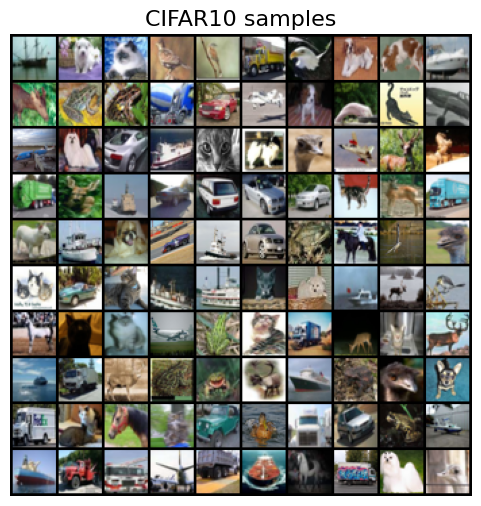

In [6]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

Let revise some theoretical details.

The GAN objective is
$$
\min_{\boldsymbol{\theta}} \max_{\boldsymbol{\phi}} \left[ \mathbb{E}_{\pi(\mathbf{x})} \log D_{\boldsymbol{\phi}}(\mathbf{x}) + \mathbb{E}_{p(\mathbf{z})} \log (1 - D_{\boldsymbol{\phi}}(G_{\boldsymbol{\theta}}(\mathbf{z}))) \right]
$$
In practice we made iterative updates for generator and discriminator. This leads us to two separate optimization task:
- discriminator task (with fixed $G_{\boldsymbol{\theta}}(\mathbf{z})$)
$$
\max_{\boldsymbol{\phi}} \left[ \mathbb{E}_{\pi(\mathbf{x})} \log D_{\boldsymbol{\phi}}(\mathbf{x}) + \mathbb{E}_{p(\mathbf{z})} \log (1 - D_{\boldsymbol{\phi}}(G_{\boldsymbol{\theta}}(\mathbf{z}))) \right]
$$
- generator task (with fixed $D_{\boldsymbol{\phi}}(\mathbf{x})$)
$$
\min_{\boldsymbol{\theta}} \left[\mathbb{E}_{p(\mathbf{z})} \log (1 - D_{\boldsymbol{\phi}}(G_{\boldsymbol{\theta}}(\mathbf{z}))) \right]
$$

Note that (1) we have maximization task for discriminator (usually we minimize losses, so we will make it negative), we dropped the second term in generator task (it does not depend on $\boldsymbol{\theta}$, so it is constant).

Moreover, to avoid vanishing gradients we will use **non-saturated** version of generator loss:
$$
\max_{\boldsymbol{\theta}} \left[\mathbb{E}_{p(\mathbf{z})} \log (D_{\boldsymbol{\phi}}(G_{\boldsymbol{\theta}}(\mathbf{z}))) \right].
$$

Now we have to implement our generator and discriminator models. It will be convolutional models.

In [47]:
class Generator(nn.Module):
    def __init__(self, z_dim, n_channels=64):
        super().__init__()

        self.z_dim = z_dim
        self.noise = torch.distributions.Normal(torch.tensor(0.0), torch.tensor(1.0))

        log_channels = np.log2(n_channels)
        int_log_ch = int(log_channels)

        if np.log2(n_channels) - int(np.log2(n_channels)) > 1e-9:
            raise ValueError(f'n_channels should be degree of 2, got {n_channels}')

        modules = []
        start_ch = min(128, 2**int_log_ch)
        min_ch = 8

        for i in range(int(np.log2(n_channels))):
            if i == 0:
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose2d(z_dim, start_ch, kernel_size=4, stride=2, padding=1, bias=False),
                        nn.BatchNorm2d(start_ch),
                        nn.ReLU(True)
                    )
                )
            elif i + 1 == int(np.log2(n_channels)):
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose2d(min_ch, 3, kernel_size=4, stride=2, padding=1, bias=False),
                        nn.Sigmoid()
                    )
                )
            else:
                ch_from = max(min_ch, start_ch // 2**(i-1))
                ch_to = min_ch if ch_from == min_ch else ch_from // 2
                modules.append(
                    nn.Sequential(
                        nn.ConvTranspose2d(ch_from, ch_to, kernel_size=4, stride=2, padding=1, bias=False),
                        nn.BatchNorm2d(ch_to),
                        nn.ReLU(True)
                    )
                )

        self.net = nn.Sequential(*modules)

    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, x):
        if x.ndim == 2:
            return self.net(x.unsqueeze(-1).unsqueeze(-1))
        else:
            return self.net(x)

    def sample(self, n_samples: int) -> torch.Tensor:
        noise = self.noise.sample((n_samples, self.z_dim, 1, 1)).to(self.device)
        noisy_samples = self.net(noise)
        return noisy_samples


def test_generator():
    x = torch.randn((10, 32))
    generator = Generator(z_dim=32, n_channels=32)
    output = generator(x)
    assert list(output.shape) == [10, 3, 32, 32]

    output = generator.sample(10)
    assert list(output.shape) == [10, 3, 32, 32]


test_generator()

In [48]:
class Discriminator(nn.Module):
    def __init__(self, img_size=32):
        super().__init__()
        # ====
        log_img_size = np.log2(img_size)
        int_log_size = int(log_img_size)

        if log_img_size - int_log_size > 1e-9:
            raise ValueError(f'n_channels should be degree of 2, got {img_size}')

        modules = []
        start_ch = 64
        min_img_size = 2**3
        max_ch = min(512, start_ch * 2**(int_log_size - 1 - int(np.log2(min_img_size))))

        for i in range(int_log_size - int(np.log2(min_img_size))):
            if i == 0:
                modules.append(
                    nn.Sequential(
                        nn.Conv2d(3, start_ch, kernel_size=4, stride=2, padding=1, bias=False),
                        nn.BatchNorm2d(start_ch),
                        nn.ReLU(True)
                    )
                )
            else:
                ch_from = min(max_ch, start_ch * 2**(i-1))
                ch_to = min(max_ch, 2*ch_from)
                modules.append(
                    nn.Sequential(
                        nn.Conv2d(ch_from, ch_to, kernel_size=4, stride=2, padding=1, bias=False),
                        nn.BatchNorm2d(ch_to),
                        nn.ReLU(True)
                    )
                )

        modules.append(
            nn.Sequential(
                nn.Flatten(),
                nn.Dropout(0.25),
                nn.Linear(max_ch*min_img_size**2, 1),
                nn.Sigmoid()
            )
        )
        self.net = nn.Sequential(*modules)

    def forward(self, x):
        return self.net(x)


def test_discriminator():
    x = torch.randn((10, 3, 32, 32))
    discriminator = Discriminator()
    output = discriminator(x)
    assert list(output.shape) == [10, 1]


test_discriminator()

Now let to implement function for training our GAN.

In [59]:
def train_gan(
    generator: object,
    discriminator: object,
    train_loader: object,
    batch_size: int,
    n_epochs: int,
    lr: float,
    use_cuda: bool = False,
) -> dict:

    if use_cuda:
        discriminator = discriminator.cuda()
        generator = generator.cuda()

    discriminator.train()
    generator.train()

    EPS = 1e-10

    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0, 0.9))
    discr_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0, 0.9))

    curr_iter = 0
    d_loss, g_loss = torch.zeros(1), torch.zeros(1)
    batch_loss_history = {"discriminator_losses": [], "generator_losses": []}
    for epoch_i in tqdm(range(n_epochs)):

        discriminator.train()
        generator.train()
        for batch_i, x in enumerate(train_loader):
            curr_iter += 1
            x = x.to(generator.device)

            # discriminator update
            discr_optimizer.zero_grad()

            # ====
            # calculate discriminator loss
            # - log (D(x_real)) - log (1 - D(x_fake))
            real_preds = discriminator(x)
            real_loss = torch.mean(torch.log(EPS + real_preds))

            # Generate fake images
            fake_images = generator.sample(x.shape[0])
            fake_preds = discriminator(fake_images)
            fake_loss = torch.mean(torch.log(1 + EPS - fake_preds))

            d_loss = real_loss + fake_loss

            # ====
            d_loss.backward(retain_graph=True)
            discr_optimizer.step()

            # generator update
            gen_optimizer.zero_grad()

            # ====
            # calculate generator loss (non-saturated version)
            # - log (D(x_fake))
            fake_images_2 = generator.sample(x.shape[0])
            fake_preds_2 = discriminator(fake_images)
            g_loss = -torch.mean(torch.log(EPS+fake_preds_2))

            # ====
            g_loss.backward()
            gen_optimizer.step()

            batch_loss_history["generator_losses"].append(g_loss.data.cpu().numpy())
            batch_loss_history["discriminator_losses"].append(
                d_loss.data.cpu().numpy()
            )

    return batch_loss_history

  0%|          | 0/2 [00:00<?, ?it/s]

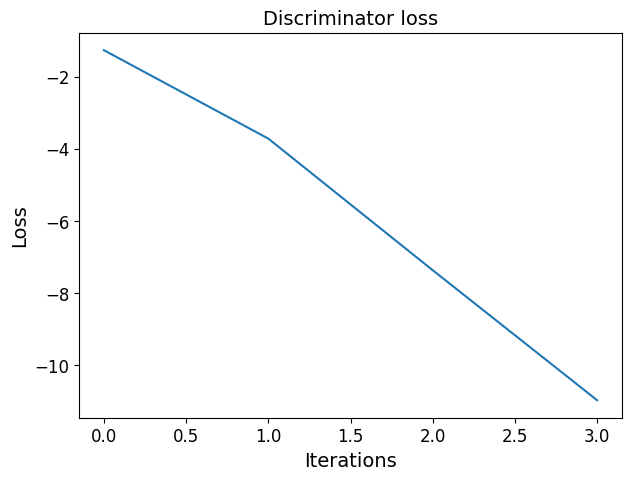

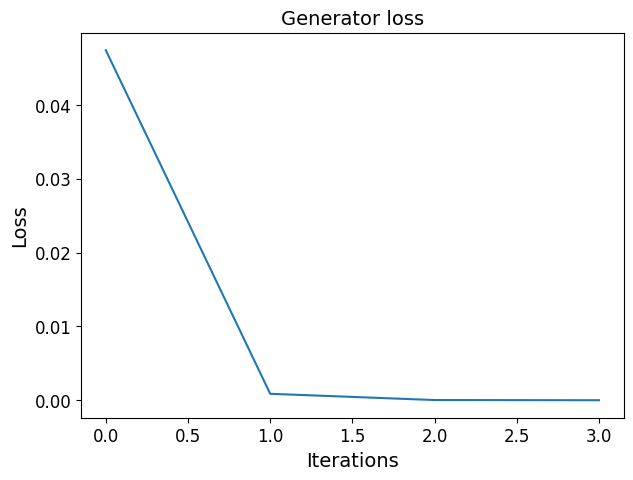

In [60]:
# ====
# your code
# choose these parameters (you have to train the model more than 20 epochs to get good results)
BATCH_SIZE = 64  # any adequate value
N_CHANNELS = 32  # > 32
N_EPOCHS = 2    # > 10
LR = 5e-4          # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

generator = Generator(z_dim=128, n_channels=N_CHANNELS)
discriminator = Discriminator(img_size=32)

train_losses = train_gan(
    generator,
    discriminator,
    train_loader,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

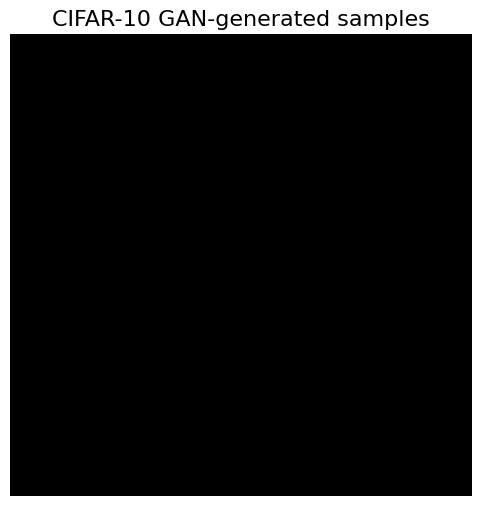

In [61]:
generator.eval()
discriminator.eval()
with torch.no_grad():
    samples = generator.sample(100)
    samples = samples.cpu().detach().numpy()


show_samples(samples, title="CIFAR-10 GAN-generated samples")